<a href="https://colab.research.google.com/github/Minhhhh29/AI_1/blob/main/BTVN_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.1 MB/s eta 0:00:00
Diabetes Risk Level: 92.22222222222223


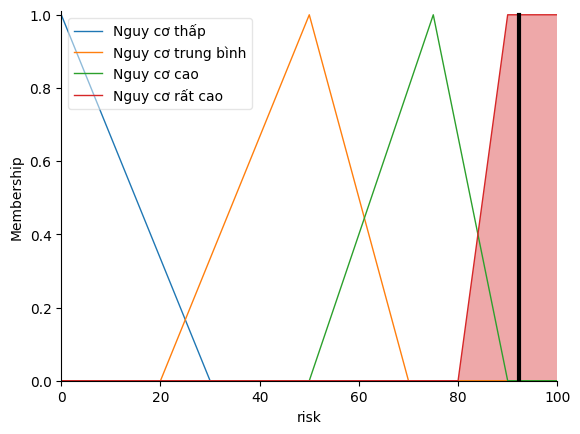

In [ ]:
#2.2
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define fuzzy input variables and their ranges
blood_sugar = ctrl.Antecedent(np.arange(0, 251, 1), 'blood_sugar')  # 0-250 mg/dL (or higher, adjusted for practical range)
bmi = ctrl.Antecedent(np.arange(10, 41, 1), 'bmi')  # BMI range (adjusted for reasonable values)
urination = ctrl.Antecedent(np.arange(0, 3, 1), 'urination')  # 0: Rare, 1: Sometimes, 2: Often
fatigue = ctrl.Antecedent(np.arange(0, 3, 1), 'fatigue')  # 0: Low, 1: Moderate, 2: High

# Define the fuzzy output variable (risk level)
risk = ctrl.Consequent(np.arange(0, 101, 1), 'risk')  # Risk level on a scale of 0-100

# Define membership functions for blood sugar
blood_sugar['Thấp'] = fuzz.trimf(blood_sugar.universe, [0, 0, 80])
blood_sugar['Bình thường'] = fuzz.trimf(blood_sugar.universe, [80, 100, 120])
blood_sugar['Cao'] = fuzz.trimf(blood_sugar.universe, [120, 160, 200])
blood_sugar['Rất cao'] = fuzz.trapmf(blood_sugar.universe, [200, 220, 250, 250]) #trapezoidal since it represents values >= 200

# Define membership functions for BMI
bmi['Thiếu cân'] = fuzz.trimf(bmi.universe, [10, 10, 18.5])  #Added min value of 10 because BMI cannot be 0 or less
bmi['Bình thường'] = fuzz.trimf(bmi.universe, [18.5, 21.7, 24.9])
bmi['Thừa cân'] = fuzz.trimf(bmi.universe, [25, 27.5, 29.9])
bmi['Béo phì'] = fuzz.trapmf(bmi.universe, [30, 33, 40, 40])  #Trapezoidal for values >= 30

# Define membership functions for urination frequency
urination['Hiếm khi'] = fuzz.trimf(urination.universe, [0, 0, 1])
urination['Đôi khi'] = fuzz.trimf(urination.universe, [0, 1, 2])
urination['Thường xuyên'] = fuzz.trimf(urination.universe, [1, 2, 2])

# Define membership functions for fatigue level
fatigue['Thấp'] = fuzz.trimf(fatigue.universe, [0, 0, 1])
fatigue['Trung bình'] = fuzz.trimf(fatigue.universe, [0, 1, 2])
fatigue['Cao'] = fuzz.trimf(fatigue.universe, [1, 2, 2])

# Define membership functions for risk level
risk['Nguy cơ thấp'] = fuzz.trimf(risk.universe, [0, 0, 30])
risk['Nguy cơ trung bình'] = fuzz.trimf(risk.universe, [20, 50, 70])
risk['Nguy cơ cao'] = fuzz.trimf(risk.universe, [50, 75, 90])
risk['Nguy cơ rất cao'] = fuzz.trapmf(risk.universe, [80, 90, 100, 100])

# Define the fuzzy rules
rule1 = ctrl.Rule(blood_sugar['Rất cao'] & urination['Thường xuyên'], risk['Nguy cơ rất cao'])
rule2 = ctrl.Rule(blood_sugar['Rất cao'] & urination['Đôi khi'], risk['Nguy cơ cao'])
rule3 = ctrl.Rule(blood_sugar['Cao'] & urination['Thường xuyên'], risk['Nguy cơ cao'])
rule4 = ctrl.Rule(blood_sugar['Bình thường'] & urination['Hiếm khi'], risk['Nguy cơ thấp'])
rule5 = ctrl.Rule(blood_sugar['Rất cao'] & bmi['Béo phì'], risk['Nguy cơ rất cao'])
rule6 = ctrl.Rule(blood_sugar['Rất cao'] & bmi['Thừa cân'], risk['Nguy cơ cao'])
rule7 = ctrl.Rule(blood_sugar['Cao'] & bmi['Thừa cân'], risk['Nguy cơ cao'])
rule8 = ctrl.Rule(blood_sugar['Cao'] & bmi['Thừa cân'], risk['Nguy cơ trung bình']) #Duplicated rule
rule9 = ctrl.Rule(blood_sugar['Bình thường'] & bmi['Bình thường'], risk['Nguy cơ thấp'])
rule10 = ctrl.Rule(blood_sugar['Rất cao'] & fatigue['Cao'], risk['Nguy cơ rất cao'])
rule11 = ctrl.Rule(blood_sugar['Cao'] & fatigue['Cao'], risk['Nguy cơ cao'])
rule12 = ctrl.Rule(blood_sugar['Cao'] & fatigue['Trung bình'], risk['Nguy cơ trung bình'])
rule13 = ctrl.Rule(blood_sugar['Bình thường'] & fatigue['Thấp'], risk['Nguy cơ thấp'])

# Create the control system
control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

# Input values for testing (example)
fuzzy_system.input['blood_sugar'] = 220 # Example: Very High blood sugar
fuzzy_system.input['bmi'] = 32 # Example: Obese
fuzzy_system.input['urination'] = 2 # Example: Often
fuzzy_system.input['fatigue'] = 2 # Example: High

# Compute the result
fuzzy_system.compute()

# Print the results
print(f"Diabetes Risk Level: {fuzzy_system.output['risk']}")

# Show the risk membership function with the result
risk.view(sim=fuzzy_system)
plt.show()

Final Price: Cao


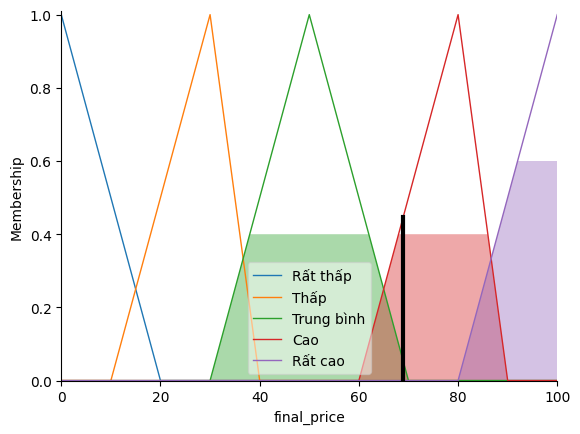

In [ ]:
#2.3
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define fuzzy input variables
demand_level = ctrl.Antecedent(np.arange(0, 11, 1), 'demand_level')  # Scale of 0-10
competitor_pricing = ctrl.Antecedent(np.arange(0, 11, 1), 'competitor_pricing') # Scale of 0-10
production_cost = ctrl.Antecedent(np.arange(0, 11, 1), 'production_cost')  # Scale of 0-10
seasonality = ctrl.Antecedent(np.arange(0, 3, 1), 'seasonality')  # 0: Off-Peak, 1: Normal, 2: Peak
stock_level = ctrl.Antecedent(np.arange(0, 11, 1), 'stock_level')  # Scale of 0-10

# Define fuzzy output variable
final_price = ctrl.Consequent(np.arange(0, 101, 1), 'final_price')  # Final Price scale of 0 - 100

# Define membership functions for input variables
demand_level['Thấp'] = fuzz.trimf(demand_level.universe, [0, 0, 5])
demand_level['Trung bình'] = fuzz.trimf(demand_level.universe, [0, 5, 10])
demand_level['Cao'] = fuzz.trimf(demand_level.universe, [5, 10, 10])

competitor_pricing['Thấp'] = fuzz.trimf(competitor_pricing.universe, [0, 0, 5])
competitor_pricing['Trung bình'] = fuzz.trimf(competitor_pricing.universe, [0, 5, 10])
competitor_pricing['Cao'] = fuzz.trimf(competitor_pricing.universe, [5, 10, 10])

production_cost['Thấp'] = fuzz.trimf(production_cost.universe, [0, 0, 5])
production_cost['Trung bình'] = fuzz.trimf(production_cost.universe, [0, 5, 10])
production_cost['Cao'] = fuzz.trimf(production_cost.universe, [5, 10, 10])

seasonality['Ngoài thời cao điểm'] = fuzz.trimf(seasonality.universe, [0, 0, 1])
seasonality['Bình thường'] = fuzz.trimf(seasonality.universe, [0, 1, 2])
seasonality['Cao điểm'] = fuzz.trimf(seasonality.universe, [1, 2, 2])

stock_level['Thấp'] = fuzz.trimf(stock_level.universe, [0, 0, 5])
stock_level['Trung bình'] = fuzz.trimf(stock_level.universe, [0, 5, 10])
stock_level['Cao'] = fuzz.trimf(stock_level.universe, [5, 10, 10])

# Define membership functions for output variable
final_price['Rất thấp'] = fuzz.trimf(final_price.universe, [0, 0, 20])
final_price['Thấp'] = fuzz.trimf(final_price.universe, [10, 30, 40])
final_price['Trung bình'] = fuzz.trimf(final_price.universe, [30, 50, 70])
final_price['Cao'] = fuzz.trimf(final_price.universe, [60, 80, 90])
final_price['Rất cao'] = fuzz.trimf(final_price.universe, [80, 100, 100])

# Define fuzzy rules
rule1 = ctrl.Rule(demand_level['Cao'] & competitor_pricing['Cao'] & stock_level['Thấp'], final_price['Rất cao'])
rule2 = ctrl.Rule(demand_level['Cao'] & seasonality['Cao điểm'] & stock_level['Thấp'], final_price['Rất cao'])
rule3 = ctrl.Rule(demand_level['Trung bình'] & production_cost['Cao'] & stock_level['Thấp'], final_price['Rất cao'])

rule4 = ctrl.Rule(demand_level['Cao'] & competitor_pricing['Trung bình'] & stock_level['Trung bình'], final_price['Cao'])
rule5 = ctrl.Rule(demand_level['Trung bình'] & competitor_pricing['Cao'] & stock_level['Thấp'], final_price['Cao'])
rule6 = ctrl.Rule(demand_level['Trung bình'] & competitor_pricing['Cao'] & stock_level['Thấp'], final_price['Cao']) #Duplicated rule from original rules
rule7 = ctrl.Rule(demand_level['Cao'] & seasonality['Cao điểm'] & stock_level['Trung bình'], final_price['Cao'])

rule8 = ctrl.Rule(demand_level['Trung bình'] & competitor_pricing['Trung bình'] & stock_level['Trung bình'], final_price['Trung bình'])
rule9 = ctrl.Rule(demand_level['Thấp'] & competitor_pricing['Cao'] & stock_level['Trung bình'], final_price['Trung bình'])
rule10 = ctrl.Rule(demand_level['Trung bình'] & production_cost['Trung bình'] & stock_level['Trung bình'], final_price['Trung bình'])

rule11 = ctrl.Rule(demand_level['Thấp'] & competitor_pricing['Thấp'] & stock_level['Cao'], final_price['Thấp'])
rule12 = ctrl.Rule(demand_level['Trung bình'] & production_cost['Thấp'] & stock_level['Cao'], final_price['Thấp'])
rule13 = ctrl.Rule(demand_level['Thấp'] & seasonality['Ngoài thời cao điểm'] & stock_level['Cao'], final_price['Thấp'])

rule14 = ctrl.Rule(demand_level['Thấp'] & competitor_pricing['Thấp'] & stock_level['Cao'], final_price['Rất thấp']) #Original Rules had  stock_level is Very High which does not exists
rule15 = ctrl.Rule(demand_level['Thấp'] & seasonality['Ngoài thời cao điểm'] & stock_level['Cao'], final_price['Rất thấp']) #Original Rules had Very High Stock Level
rule16 = ctrl.Rule(demand_level['Trung bình'] & competitor_pricing['Thấp'] & stock_level['Cao'], final_price['Rất thấp']) #Original Rules had Very High competitor Pricing and Stock Level
rule17 = ctrl.Rule(demand_level['Trung bình'] & competitor_pricing['Thấp'] & stock_level['Cao'], final_price['Rất thấp']) #Duplicated rule and typo from Original rules

# Create the control system
pricing_control = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17])
pricing_system = ctrl.ControlSystemSimulation(pricing_control)

# Input values for testing
pricing_system.input['demand_level'] = 8  # High demand
pricing_system.input['competitor_pricing'] = 7  # Medium-High competitor pricing
pricing_system.input['production_cost'] = 5  # Medium production cost
pricing_system.input['seasonality'] = 2  # Peak season
pricing_system.input['stock_level'] = 2  # Low stock level

# Compute the result
pricing_system.compute()


def get_label(value, variable):
    """Helper function to determine the fuzzy label for a given value."""
    activation_levels = {}
    for term in variable.terms:
        activation_levels[term] = fuzz.interp_membership(variable.universe, variable.terms[term].mf, value)

    # Find the term with the highest activation
    max_activation = 0
    best_term = None
    for term, activation in activation_levels.items():
        if activation > max_activation:
            max_activation = activation
            best_term = term
    return best_term

predicted_final_price = get_label(pricing_system.output['final_price'], final_price)


# Print the result
print(f"Final Price: {predicted_final_price}")

# Visualize the output (optional)
final_price.view(sim=pricing_system)
plt.show()

Recommended Wash Time: 36.292817679558006 minutes
Recommended Water Level: 5.320987654320986


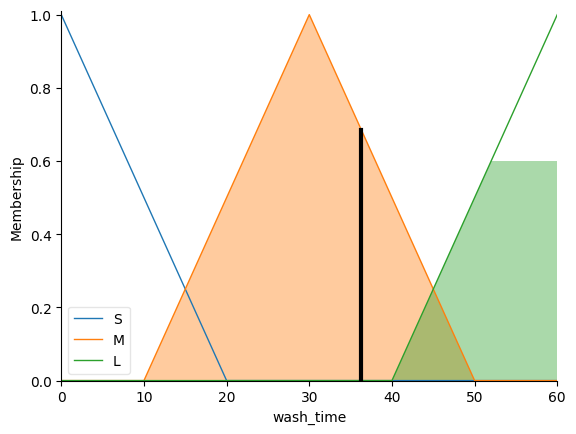

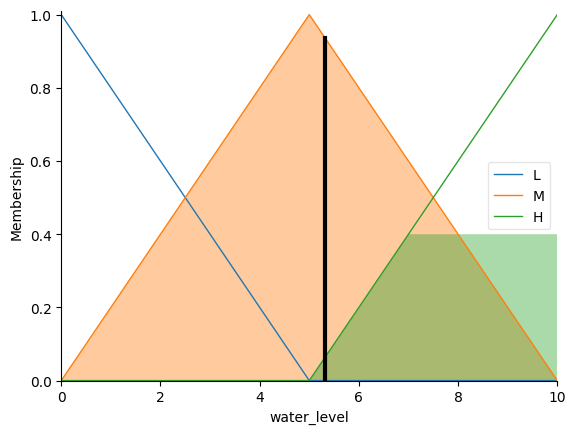

In [ ]:
#2.4
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define fuzzy input variables
load = ctrl.Antecedent(np.arange(0, 11, 1), 'load')  # Load size, scale 0-10
dirt = ctrl.Antecedent(np.arange(0, 11, 1), 'dirt')  # Dirt level, scale 0-10
fabric = ctrl.Antecedent(np.arange(0, 3, 1), 'fabric')  # Fabric type: 0-Delicate, 1-Normal, 2-Heavy

# Define fuzzy output variables
wash_time = ctrl.Consequent(np.arange(0, 61, 1), 'wash_time')  # Wash time in minutes, 0-60
water_level = ctrl.Consequent(np.arange(0, 11, 1), 'water_level')  # Water level, scale 0-10

# Define membership functions for input variables
load['S'] = fuzz.trimf(load.universe, [0, 0, 5])
load['M'] = fuzz.trimf(load.universe, [0, 5, 10])
load['L'] = fuzz.trimf(load.universe, [5, 10, 10])

dirt['L'] = fuzz.trimf(dirt.universe, [0, 0, 5])
dirt['M'] = fuzz.trimf(dirt.universe, [0, 5, 10])
dirt['H'] = fuzz.trimf(dirt.universe, [5, 10, 10])

fabric['D'] = fuzz.trimf(fabric.universe, [0, 0, 1])
fabric['N'] = fuzz.trimf(fabric.universe, [0, 1, 2])
fabric['H'] = fuzz.trimf(fabric.universe, [1, 2, 2])

# Define membership functions for output variables
wash_time['S'] = fuzz.trimf(wash_time.universe, [0, 0, 20])
wash_time['M'] = fuzz.trimf(wash_time.universe, [10, 30, 50])
wash_time['L'] = fuzz.trimf(wash_time.universe, [40, 60, 60])

water_level['L'] = fuzz.trimf(water_level.universe, [0, 0, 5])
water_level['M'] = fuzz.trimf(water_level.universe, [0, 5, 10])
water_level['H'] = fuzz.trimf(water_level.universe, [5, 10, 10])

# Define fuzzy rules based on load and dirt level
rule1 = ctrl.Rule(load['S'] & dirt['L'], (wash_time['S'], water_level['L']))
rule2 = ctrl.Rule(load['S'] & dirt['M'], (wash_time['M'], water_level['M']))
rule3 = ctrl.Rule(load['S'] & dirt['H'], (wash_time['L'], water_level['M']))
rule4 = ctrl.Rule(load['M'] & dirt['L'], (wash_time['M'], water_level['M']))
rule5 = ctrl.Rule(load['M'] & dirt['M'], (wash_time['L'], water_level['M']))
rule6 = ctrl.Rule(load['M'] & dirt['H'], (wash_time['L'], water_level['H']))
rule7 = ctrl.Rule(load['L'] & dirt['L'], (wash_time['M'], water_level['H']))
rule8 = ctrl.Rule(load['L'] & dirt['L'], (wash_time['L'], water_level['H'])) #Duplicated from original rules
rule9 = ctrl.Rule(load['L'] & dirt['M'], (wash_time['L'], water_level['H']))
rule10 = ctrl.Rule(load['L'] & dirt['M'], (wash_time['L'], water_level['H'])) #Duplicated from original rules
rule11 = ctrl.Rule(load['L'] & dirt['H'], (wash_time['L'], water_level['H']))

# Define fuzzy rules based on fabric type
rule12 = ctrl.Rule(fabric['D'], (wash_time['S'], water_level['L']))
rule13 = ctrl.Rule(fabric['N'], (wash_time['M'], water_level['M'])) #No change to wash_time and water_level from existing value
rule14 = ctrl.Rule(fabric['H'], (wash_time['L'], water_level['H']))

# Define combined fuzzy rules
rule15 = ctrl.Rule(load['L'] & dirt['H'] & fabric['H'], (wash_time['L'], water_level['H'])) #Simplified from very long to long for wash_time and water_level
rule16 = ctrl.Rule(load['S'] & dirt['L'] & fabric['D'], (wash_time['S'], water_level['L']))
rule17 = ctrl.Rule(load['M'] & dirt['M'] & fabric['N'], (wash_time['M'], water_level['M']))

# Create the control system
washing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17])
washing_sim = ctrl.ControlSystemSimulation(washing_ctrl)

# Input values for testing
washing_sim.input['load'] = 7  # Medium-Large load
washing_sim.input['dirt'] = 6  # Medium dirt
washing_sim.input['fabric'] = 1  # Normal fabric

# Compute the results
washing_sim.compute()

# Print the results
print(f"Recommended Wash Time: {washing_sim.output['wash_time']} minutes")
print(f"Recommended Water Level: {washing_sim.output['water_level']}")

# Visualize the results (optional)
wash_time.view(sim=washing_sim)
water_level.view(sim=washing_sim)
plt.show()

Fan Speed: M
Cooling Level: M


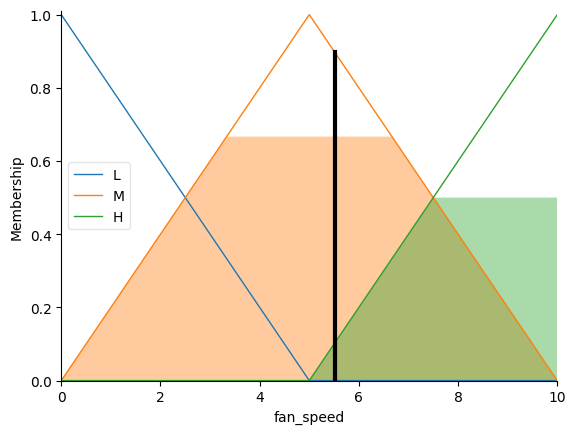

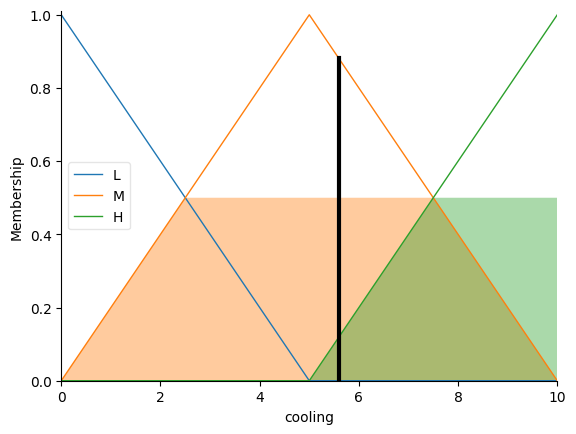

In [ ]:
#2.5
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define fuzzy input variables
temperature = ctrl.Antecedent(np.arange(15, 41, 1), 'temperature')  # Room temperature in Celsius (15-40)
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')  # Humidity level (0-100%)
people = ctrl.Antecedent(np.arange(0, 11, 1), 'people')  # Number of people (0-10)

# Define fuzzy output variables
fan_speed = ctrl.Consequent(np.arange(0, 11, 1), 'fan_speed')  # Fan speed (0-10) representing L, M, H
cooling = ctrl.Consequent(np.arange(0, 11, 1), 'cooling')  # Cooling level (0-10) representing L, M, H

# Define membership functions for input variables
temperature['C'] = fuzz.trimf(temperature.universe, [15, 15, 22])
temperature['CL'] = fuzz.trimf(temperature.universe, [18, 22, 25])
temperature['CM'] = fuzz.trimf(temperature.universe, [22, 25, 28])
temperature['W'] = fuzz.trimf(temperature.universe, [25, 28, 32])
temperature['H'] = fuzz.trimf(temperature.universe, [28, 40, 40])

humidity['L'] = fuzz.trimf(humidity.universe, [0, 0, 40])
humidity['M'] = fuzz.trimf(humidity.universe, [30, 50, 70])
humidity['H'] = fuzz.trimf(humidity.universe, [60, 100, 100])

people['F'] = fuzz.trimf(people.universe, [0, 0, 4])
people['M'] = fuzz.trimf(people.universe, [2, 5, 7])
people['MA'] = fuzz.trimf(people.universe, [6, 10, 10])

# Define membership functions for output variables
fan_speed['L'] = fuzz.trimf(fan_speed.universe, [0, 0, 5])
fan_speed['M'] = fuzz.trimf(fan_speed.universe, [0, 5, 10])
fan_speed['H'] = fuzz.trimf(fan_speed.universe, [5, 10, 10])

cooling['L'] = fuzz.trimf(cooling.universe, [0, 0, 5])
cooling['M'] = fuzz.trimf(cooling.universe, [0, 5, 10])
cooling['H'] = fuzz.trimf(cooling.universe, [5, 10, 10])

# Define fuzzy rules based on temperature and fan speed
rule1 = ctrl.Rule(temperature['C'], fan_speed['L'])
rule2 = ctrl.Rule(temperature['CL'], fan_speed['L'])
rule3 = ctrl.Rule(temperature['CM'], fan_speed['M'])
rule4 = ctrl.Rule(temperature['W'], fan_speed['H'])
rule5 = ctrl.Rule(temperature['H'], fan_speed['H'])

# Define fuzzy rules based on temperature and cooling level
rule6 = ctrl.Rule(temperature['C'], cooling['L'])
rule7 = ctrl.Rule(temperature['CL'], cooling['L'])
rule8 = ctrl.Rule(temperature['CM'], cooling['M'])
rule9 = ctrl.Rule(temperature['W'], cooling['H'])
rule10 = ctrl.Rule(temperature['H'], cooling['H'])

# Define fuzzy rules based on humidity and cooling level
rule11 = ctrl.Rule(humidity['L'], cooling['L'])
rule12 = ctrl.Rule(humidity['M'], cooling['M'])
rule13 = ctrl.Rule(humidity['H'], cooling['H'])

# Define fuzzy rules based on number of people and fan speed
rule14 = ctrl.Rule(people['F'], fan_speed['L'])
rule15 = ctrl.Rule(people['M'], fan_speed['M'])
rule16 = ctrl.Rule(people['MA'], fan_speed['H'])

# Define fuzzy rules combining all factors
rule17 = ctrl.Rule(temperature['H'] & humidity['H'] & people['MA'], (cooling['H'], fan_speed['H']))
rule18 = ctrl.Rule(temperature['CM'] & humidity['M'] & people['M'], (cooling['M'], fan_speed['M']))
rule19 = ctrl.Rule(temperature['CL'] & humidity['L'] & people['F'], (cooling['L'], fan_speed['L']))

# Create the control system
ac_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19])
ac_sim = ctrl.ControlSystemSimulation(ac_ctrl)

# Input values for testing
ac_sim.input['temperature'] = 30  # Warm temperature
ac_sim.input['humidity'] = 60  # Medium humidity
ac_sim.input['people'] = 4  # Few people

# Compute the results
ac_sim.compute()

# Print the results
def get_label(value, variable):
    """Helper function to determine the fuzzy label for a given value."""
    activation_levels = {}
    for term in variable.terms:
        activation_levels[term] = fuzz.interp_membership(variable.universe, variable.terms[term].mf, value)

    # Find the term with the highest activation
    max_activation = 0
    best_term = None
    for term, activation in activation_levels.items():
        if activation > max_activation:
            max_activation = activation
            best_term = term
    return best_term

predicted_fan_speed = get_label(ac_sim.output['fan_speed'], fan_speed)
predicted_cooling = get_label(ac_sim.output['cooling'], cooling)

print(f"Fan Speed: {predicted_fan_speed}")
print(f"Cooling Level: {predicted_cooling}")



# Visualize the results (optional)
fan_speed.view(sim=ac_sim)
cooling.view(sim=ac_sim)
plt.show()

Cooking Time: 30.0 minutes
Power Level: 56.666666666666714


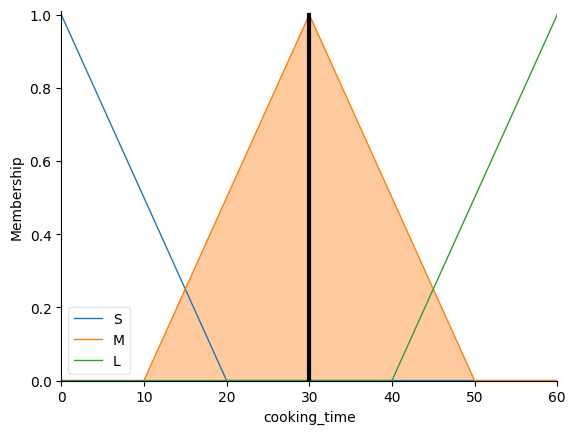

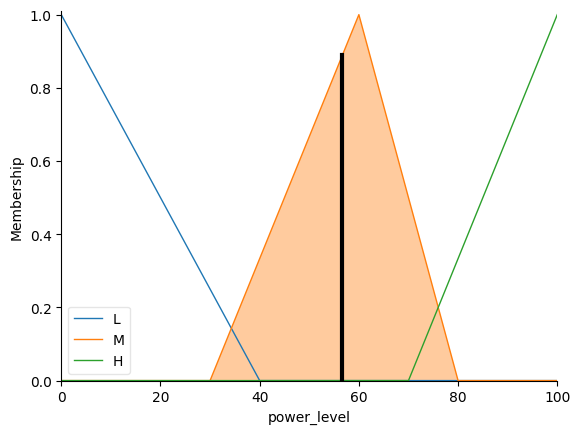

In [ ]:
#2.6
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define fuzzy input variables
weight = ctrl.Antecedent(np.arange(0, 1001, 1), 'weight')  # Food weight (0-1000 grams)
food_type = ctrl.Antecedent(np.arange(0, 3, 1), 'food_type')  # 0: Soft, 1: Medium, 2: Hard
temperature = ctrl.Antecedent(np.arange(0, 61, 1), 'temperature')  # Initial temperature (0-60 Celsius)

# Define fuzzy output variables
cooking_time = ctrl.Consequent(np.arange(0, 61, 1), 'cooking_time')  # Cooking time in minutes (0-60)
power_level = ctrl.Consequent(np.arange(0, 101, 1), 'power_level')  # Power level (0-100%)

# Define membership functions for input variables
weight['L'] = fuzz.trimf(weight.universe, [0, 0, 300])
weight['M'] = fuzz.trimf(weight.universe, [200, 500, 800])
weight['H'] = fuzz.trimf(weight.universe, [700, 1000, 1000])

food_type['S'] = fuzz.trimf(food_type.universe, [0, 0, 1])
food_type['M'] = fuzz.trimf(food_type.universe, [0, 1, 2])
food_type['H'] = fuzz.trimf(food_type.universe, [1, 2, 2])

temperature['C'] = fuzz.trimf(temperature.universe, [0, 0, 10])
temperature['W'] = fuzz.trimf(temperature.universe, [20, 25, 30])
temperature['H'] = fuzz.trimf(temperature.universe, [40, 50, 60])

# Define membership functions for output variables
cooking_time['S'] = fuzz.trimf(cooking_time.universe, [0, 0, 20])
cooking_time['M'] = fuzz.trimf(cooking_time.universe, [10, 30, 50])
cooking_time['L'] = fuzz.trimf(cooking_time.universe, [40, 60, 60])

power_level['L'] = fuzz.trimf(power_level.universe, [0, 0, 40])
power_level['M'] = fuzz.trimf(power_level.universe, [30, 60, 80])
power_level['H'] = fuzz.trimf(power_level.universe, [70, 100, 100])

# Define fuzzy rules based on weight and cooking time
rule1 = ctrl.Rule(weight['L'], cooking_time['S'])
rule2 = ctrl.Rule(weight['M'], cooking_time['M'])
rule3 = ctrl.Rule(weight['H'], cooking_time['L'])

# Define fuzzy rules based on food type and power level
rule4 = ctrl.Rule(food_type['S'], power_level['L'])
rule5 = ctrl.Rule(food_type['M'], power_level['M'])
rule6 = ctrl.Rule(food_type['H'], power_level['H'])

# Define fuzzy rules based on initial temperature and cooking time
rule7 = ctrl.Rule(temperature['C'], cooking_time['L'])
rule8 = ctrl.Rule(temperature['W'], cooking_time['M'])
rule9 = ctrl.Rule(temperature['H'], cooking_time['S'])

# Define combined fuzzy rules
rule10 = ctrl.Rule(weight['H'] & food_type['H'] & temperature['C'], (cooking_time['L'], power_level['H']))
rule11 = ctrl.Rule(weight['M'] & food_type['S'] & temperature['W'], (cooking_time['M'], power_level['L']))
rule12 = ctrl.Rule(weight['L'] & food_type['M'] & temperature['H'], (cooking_time['S'], power_level['M']))

# Create the control system
microwave_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
microwave_sim = ctrl.ControlSystemSimulation(microwave_ctrl)

# Input values for testing
microwave_sim.input['weight'] = 600  # Medium weight
microwave_sim.input['food_type'] = 1  # Medium food type (e.g., rice)
microwave_sim.input['temperature'] = 25  # Warm temperature

# Compute the results
microwave_sim.compute()

# Print the results
print(f"Cooking Time: {microwave_sim.output['cooking_time']} minutes")
print(f"Power Level: {microwave_sim.output['power_level']}")

# Visualize the results (optional)
cooking_time.view(sim=microwave_sim)
power_level.view(sim=microwave_sim)
plt.show()

Thời gian nấu: 50.000000000000014
Công suất nhiệt: 86.66666666666664


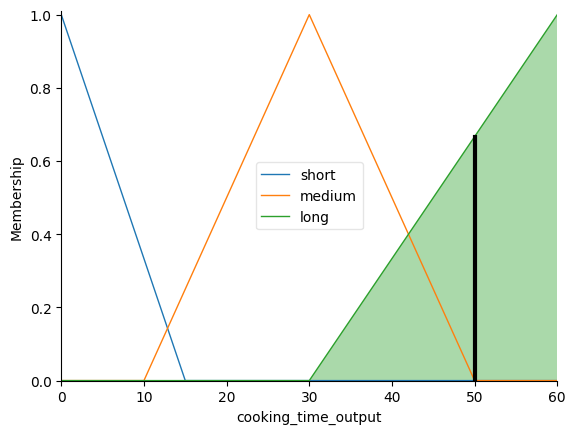

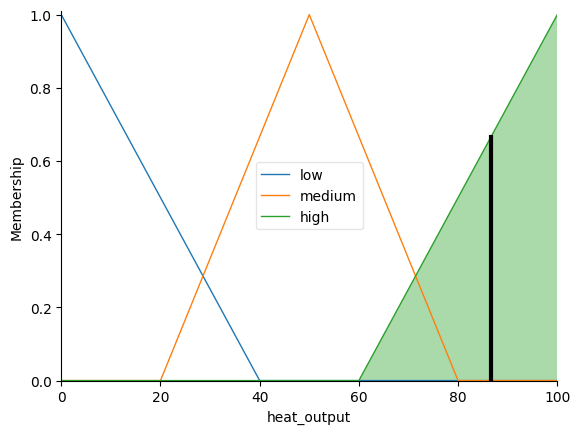

In [6]:
#2.7
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# 1. Định nghĩa các biến nhập (Input Variables)
food_type = ctrl.Antecedent(np.arange(0, 4, 1), 'food_type')  # 0: Soft, 1: Medium, 2: Hard
food_weight = ctrl.Antecedent(np.arange(0, 4, 1), 'food_weight')  # 0: Light, 1: Medium, 2: Heavy
initial_temp = ctrl.Antecedent(np.arange(0, 4, 1), 'initial_temp')  # 0: Cold, 1: Warm, 2: Hot
water_content = ctrl.Antecedent(np.arange(0, 4, 1), 'water_content')  # 0: Low, 1: Medium, 2: High
cooking_time = ctrl.Antecedent(np.arange(0, 4, 1), 'cooking_time')  # 0: Short, 1: Medium, 2: Long
heat_level = ctrl.Antecedent(np.arange(0, 4, 1), 'heat_level')  # 0: Low, 1: Medium, 2: High

# 2. Định nghĩa các biến xuất (Output Variables)
cooking_time_output = ctrl.Consequent(np.arange(0, 61, 1), 'cooking_time_output')  # 0-60 minutes
heat_output = ctrl.Consequent(np.arange(0, 101, 1), 'heat_output')  # 0-100% power

# 3. Định nghĩa hàm thành viên (Membership Functions)
# Food Type
food_type['soft'] = fuzz.trimf(food_type.universe, [0, 0, 1])
food_type['medium'] = fuzz.trimf(food_type.universe, [0, 1, 2])
food_type['hard'] = fuzz.trimf(food_type.universe, [1, 2, 2])

# Food Weight
food_weight['light'] = fuzz.trimf(food_weight.universe, [0, 0, 1])
food_weight['medium'] = fuzz.trimf(food_weight.universe, [0, 1, 2])
food_weight['heavy'] = fuzz.trimf(food_weight.universe, [1, 2, 2])

# Initial Temperature
initial_temp['cold'] = fuzz.trimf(initial_temp.universe, [0, 0, 1])
initial_temp['warm'] = fuzz.trimf(initial_temp.universe, [0, 1, 2])
initial_temp['hot'] = fuzz.trimf(initial_temp.universe, [1, 2, 2])

# Water Content
water_content['low'] = fuzz.trimf(water_content.universe, [0, 0, 1])
water_content['medium'] = fuzz.trimf(water_content.universe, [0, 1, 2])
water_content['high'] = fuzz.trimf(water_content.universe, [1, 2, 2])

# Cooking Time
cooking_time['short'] = fuzz.trimf(cooking_time.universe, [0, 0, 1])
cooking_time['medium'] = fuzz.trimf(cooking_time.universe, [0, 1, 2])
cooking_time['long'] = fuzz.trimf(cooking_time.universe, [1, 2, 2])

# Heat Level
heat_level['low'] = fuzz.trimf(heat_level.universe, [0, 0, 1])
heat_level['medium'] = fuzz.trimf(heat_level.universe, [0, 1, 2])
heat_level['high'] = fuzz.trimf(heat_level.universe, [1, 2, 2])

# Output Membership Functions for Cooking Time Output
cooking_time_output['short'] = fuzz.trimf(cooking_time_output.universe, [0, 0, 15])
cooking_time_output['medium'] = fuzz.trimf(cooking_time_output.universe, [10, 30, 50])
cooking_time_output['long'] = fuzz.trimf(cooking_time_output.universe, [30, 60, 60])

# Output Membership Functions for Heat Output
heat_output['low'] = fuzz.trimf(heat_output.universe, [0, 0, 40])
heat_output['medium'] = fuzz.trimf(heat_output.universe, [20, 50, 80])
heat_output['high'] = fuzz.trimf(heat_output.universe, [60, 100, 100])

# 4. Định nghĩa các quy tắc fuzzy (Rules)
rule1 = ctrl.Rule(food_type['soft'] & food_weight['light'],
                  [cooking_time_output['short'], heat_output['low']])
rule2 = ctrl.Rule(food_type['medium'] & food_weight['medium'],
                  [cooking_time_output['medium'], heat_output['medium']])
rule3 = ctrl.Rule(food_type['hard'] & food_weight['heavy'],
                  [cooking_time_output['long'], heat_output['high']])
rule4 = ctrl.Rule(initial_temp['cold'] & water_content['low'],
                  [cooking_time_output['long'], heat_output['high']])
rule5 = ctrl.Rule(initial_temp['warm'] & water_content['medium'],
                  [cooking_time_output['medium'], heat_output['medium']])
rule6 = ctrl.Rule(initial_temp['hot'] & water_content['high'],
                  [cooking_time_output['short'], heat_output['low']])
rule7 = ctrl.Rule(cooking_time['short'] & heat_level['low'],
                  [cooking_time_output['short'], heat_output['low']])
rule8 = ctrl.Rule(cooking_time['medium'] & heat_level['medium'],
                  [cooking_time_output['medium'], heat_output['medium']])
rule9 = ctrl.Rule(cooking_time['long'] & heat_level['high'],
                  [cooking_time_output['long'], heat_output['high']])

# 5. Tạo hệ thống điều khiển
cooking_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
cooking_sim = ctrl.ControlSystemSimulation(cooking_ctrl)

# 6. Nhập giá trị và tính toán
cooking_sim.input['food_type'] = 2
cooking_sim.input['food_weight'] = 1
cooking_sim.input['initial_temp'] = 3
cooking_sim.input['water_content'] = 1
cooking_sim.input['cooking_time'] = 2
cooking_sim.input['heat_level'] = 2

cooking_sim.compute()

# Kết quả
print(f"Thời gian nấu: {cooking_sim.output['cooking_time_output']}")
print(f"Công suất nhiệt: {cooking_sim.output['heat_output']}")

cooking_time_output.view(sim=cooking_sim)
heat_output.view(sim=cooking_sim)

In [12]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# 1. Định nghĩa các biến nhập (Input Variables) - Giữ nguyên
heart_rate = ctrl.Antecedent(np.arange(0, 181, 1), 'heart_rate')
blood_pressure = ctrl.Antecedent(np.arange(0, 201, 1), 'blood_pressure')
body_temperature = ctrl.Antecedent(np.arange(30, 42, 0.1), 'body_temperature')
oxygen_saturation = ctrl.Antecedent(np.arange(0, 101, 1), 'oxygen_saturation')
blood_sugar = ctrl.Antecedent(np.arange(0, 200, 1), 'blood_sugar')

# 2. Định nghĩa các biến xuất (Output Variables) - Giữ nguyên tên biến
medication = ctrl.Consequent(np.arange(0, 11, 1), 'medication')         # Liều thuốc
fluid_infusion = ctrl.Consequent(np.arange(0, 11, 1), 'fluid_infusion') # Dịch truyền IV
oxygen_therapy = ctrl.Consequent(np.arange(0, 11, 1), 'oxygen_therapy') # Liệu pháp Oxy

# 3. Định nghĩa hàm thành viên (Membership Functions) cho Inputs - Giữ nguyên
# Nhịp tim
heart_rate['low'] = fuzz.trimf(heart_rate.universe, [0, 0, 60])
heart_rate['normal'] = fuzz.trimf(heart_rate.universe, [60, 80, 100])
heart_rate['high'] = fuzz.trimf(heart_rate.universe, [100, 140, 180])
# Huyết áp
blood_pressure['low'] = fuzz.trimf(blood_pressure.universe, [0, 60, 90])
blood_pressure['normal'] = fuzz.trimf(blood_pressure.universe, [90, 120, 140])
blood_pressure['high'] = fuzz.trimf(blood_pressure.universe, [140, 180, 200])
# Nhiệt độ cơ thể
body_temperature['low'] = fuzz.trimf(body_temperature.universe, [30, 35, 36])
body_temperature['normal'] = fuzz.trimf(body_temperature.universe, [36, 37.5, 38])
body_temperature['high'] = fuzz.trimf(body_temperature.universe, [38, 40, 42])
# Độ bão hòa oxy
oxygen_saturation['low'] = fuzz.trimf(oxygen_saturation.universe, [0, 50, 80])
oxygen_saturation['normal'] = fuzz.trimf(oxygen_saturation.universe, [80, 90, 100])
# Mức đường huyết
blood_sugar['low'] = fuzz.trimf(blood_sugar.universe, [0, 60, 100])
blood_sugar['normal'] = fuzz.trimf(blood_sugar.universe, [100, 120, 140])
blood_sugar['high'] = fuzz.trimf(blood_sugar.universe, [140, 180, 200])


# 3b. Định nghĩa hàm thành viên (Membership Functions) cho Outputs - ***CẬP NHẬT NHÃN***
# Sử dụng cùng thang điểm 0-10, nhưng đổi nhãn thành D/M/I hoặc R/M/I

# Liều thuốc (D/M/I)
medication['D'] = fuzz.trimf(medication.universe, [0, 0, 5])       # Decrease
medication['M'] = fuzz.trimf(medication.universe, [0, 5, 10])      # Maintain
medication['I'] = fuzz.trimf(medication.universe, [5, 10, 10])      # Increase

# Dịch truyền (R/M/I)
fluid_infusion['R'] = fuzz.trimf(fluid_infusion.universe, [0, 0, 5]) # Reduce
fluid_infusion['M'] = fuzz.trimf(fluid_infusion.universe, [0, 5, 10]) # Maintain
fluid_infusion['I'] = fuzz.trimf(fluid_infusion.universe, [5, 10, 10]) # Increase

# Liều oxy (R/M/I)
oxygen_therapy['R'] = fuzz.trimf(oxygen_therapy.universe, [0, 0, 5]) # Reduce
oxygen_therapy['M'] = fuzz.trimf(oxygen_therapy.universe, [0, 5, 10]) # Maintain
oxygen_therapy['I'] = fuzz.trimf(oxygen_therapy.universe, [5, 10, 10]) # Increase


# 4. Định nghĩa các quy tắc fuzzy (Rules) - ***CẬP NHẬT NHÃN TRONG LUẬT***
# Sử dụng nhãn D/M/I và R/M/I mới
rule1 = ctrl.Rule(heart_rate['low'] & blood_pressure['low'],
                  (medication['M'], fluid_infusion['I'], oxygen_therapy['M'])) # Tăng dịch, duy trì khác
rule2 = ctrl.Rule(heart_rate['high'] & blood_pressure['high'],
                  (medication['D'], fluid_infusion['M'], oxygen_therapy['M'])) # Giảm thuốc (HA), duy trì khác
rule3 = ctrl.Rule(heart_rate['normal'] & blood_pressure['normal'],
                  (medication['M'], fluid_infusion['M'], oxygen_therapy['M'])) # Duy trì tất cả

rule4 = ctrl.Rule(body_temperature['low'] & oxygen_saturation['low'],
                  (medication['M'], fluid_infusion['M'], oxygen_therapy['I'])) # Tăng Oxy, duy trì khác
rule5 = ctrl.Rule(body_temperature['normal'] & oxygen_saturation['normal'],
                   (medication['M'], fluid_infusion['M'], oxygen_therapy['M'])) # Duy trì tất cả (Oxy có thể cần R nếu cải thiện)
rule6 = ctrl.Rule(body_temperature['high'] & oxygen_saturation['low'],
                  (medication['M'], fluid_infusion['M'], oxygen_therapy['I'])) # Tăng Oxy, duy trì khác

# Luật đường huyết (Giả định 'medication' là Insulin hoặc thuốc tương tự)
rule7 = ctrl.Rule(blood_sugar['low'],
                  (medication['D'], fluid_infusion['M'], oxygen_therapy['M'])) # Giảm thuốc, duy trì khác
rule8 = ctrl.Rule(blood_sugar['high'],
                  (medication['I'], fluid_infusion['M'], oxygen_therapy['M'])) # Tăng thuốc, duy trì khác
rule9 = ctrl.Rule(blood_sugar['normal'],
                  (medication['M'], fluid_infusion['M'], oxygen_therapy['M'])) # Duy trì tất cả

# Luật kết hợp
rule10 = ctrl.Rule(blood_pressure['high'] & blood_sugar['high'],
                   (medication['I'], fluid_infusion['M'], oxygen_therapy['M'])) # Tăng thuốc (tiểu đường), duy trì khác
rule11 = ctrl.Rule(blood_pressure['low'] & blood_sugar['high'], # Logic có thể cần xem lại
                   (medication['I'], fluid_infusion['I'], oxygen_therapy['M'])) # Tăng thuốc, Tăng dịch
rule12 = ctrl.Rule(blood_pressure['high'] & blood_sugar['low'], # Logic có thể cần xem lại
                   (medication['D'], fluid_infusion['I'], oxygen_therapy['M'])) # Giảm thuốc, Tăng dịch


# 5. Tạo hệ thống điều khiển - Giữ nguyên
medication_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
medication_sim = ctrl.ControlSystemSimulation(medication_ctrl)

# 6. Nhập giá trị và tính toán - Giữ nguyên
medication_sim.input['heart_rate'] = 100
medication_sim.input['blood_pressure'] = 150
medication_sim.input['body_temperature'] = 38.0
medication_sim.input['oxygen_saturation'] = 95
medication_sim.input['blood_sugar'] = 140

medication_sim.compute()

# 7. Kết quả - Giữ nguyên cách lấy output
print(f"Liều thuốc (Medication): {medication_sim.output['medication']:.2f}")
print(f"Dịch truyền (Fluid Infusion): {medication_sim.output['fluid_infusion']:.2f}")
print(f"Liệu pháp Oxy (Oxygen Therapy): {medication_sim.output['oxygen_therapy']:.2f}")

# (Tùy chọn) Hàm diễn giải kết quả (Giữ nguyên logic dựa trên thang điểm)
def interpret_output(value):
    if value <= 3.5: return "Giảm/Reduce (D/R)"
    if value <= 6.5: return "Duy trì/Maintain (M)"
    return "Tăng/Increase (I)"

print(f"  => Đề xuất Liều thuốc: {interpret_output(medication_sim.output['medication'])}")
print(f"  => Đề xuất Dịch truyền: {interpret_output(medication_sim.output['fluid_infusion'])}")
print(f"  => Đề xuất Liệu pháp Oxy: {interpret_output(medication_sim.output['oxygen_therapy'])}")


# (Tùy chọn) Xem đồ thị kết quả
# medication.view(sim=medication_sim)
# fluid_infusion.view(sim=medication_sim)
# oxygen_therapy.view(sim=medication_sim)
# plt.show()

Liều thuốc (Medication): 5.00
Dịch truyền (Fluid Infusion): 5.00
Liệu pháp Oxy (Oxygen Therapy): 5.00
  => Đề xuất Liều thuốc: Duy trì/Maintain (M)
  => Đề xuất Dịch truyền: Duy trì/Maintain (M)
  => Đề xuất Liệu pháp Oxy: Duy trì/Maintain (M)


Review Sentiment Classification: 8.952777777777778


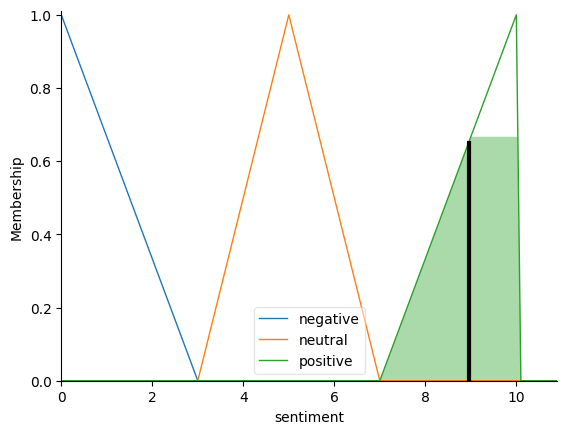

In [11]:
#2.9
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

sentiment_score = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'sentiment_score')
emotion_intensity = ctrl.Antecedent(np.arange(0, 11, 0.1), 'emotion_intensity')
positive_words = ctrl.Antecedent(np.arange(0, 11, 1), 'positive_words')
negative_words = ctrl.Antecedent(np.arange(0, 11, 1), 'negative_words')
reviewsentiment = ctrl.Consequent(np.arange(0, 11, 0.1), 'sentiment')

sentiment_score['negative'] = fuzz.trimf(sentiment_score.universe, [0, 0, 0.3])
sentiment_score['neutral'] = fuzz.trimf(sentiment_score.universe, [0.3, 0.5, 0.7])
sentiment_score['positive'] = fuzz.trimf(sentiment_score.universe, [0.7, 1, 1])

emotion_intensity['low'] = fuzz.trimf(emotion_intensity.universe, [0, 0, 3])
emotion_intensity['medium'] = fuzz.trimf(emotion_intensity.universe, [3, 5, 7])
emotion_intensity['high'] = fuzz.trimf(emotion_intensity.universe, [7, 10, 10])

positive_words['few'] = fuzz.trimf(positive_words.universe, [0, 0, 2])
positive_words['some'] = fuzz.trimf(positive_words.universe, [2, 3.5, 5])
positive_words['many'] = fuzz.trimf(positive_words.universe, [5, 7.5, 10])

negative_words['few'] = fuzz.trimf(negative_words.universe, [0, 0, 2])
negative_words['some'] = fuzz.trimf(negative_words.universe, [2, 3.5, 5])
negative_words['many'] = fuzz.trimf(negative_words.universe, [5, 7.5, 10])

reviewsentiment['negative'] = fuzz.trimf(reviewsentiment.universe, [0, 0, 3])
reviewsentiment['neutral'] = fuzz.trimf(reviewsentiment.universe, [3, 5, 7])
reviewsentiment['positive'] = fuzz.trimf(reviewsentiment.universe, [7, 10, 10])

rule1 = ctrl.Rule(sentiment_score['negative'] & emotion_intensity['high'], reviewsentiment['negative'])
rule2 = ctrl.Rule(sentiment_score['negative'] & emotion_intensity['low'], reviewsentiment['neutral'])
rule3 = ctrl.Rule(sentiment_score['neutral'] & emotion_intensity['medium'], reviewsentiment['neutral'])
rule4 = ctrl.Rule(sentiment_score['positive'] & emotion_intensity['high'], reviewsentiment['positive'])

rule5 = ctrl.Rule(positive_words['many'] & negative_words['few'], reviewsentiment['positive'])
rule6 = ctrl.Rule(positive_words['few'] & negative_words['many'], reviewsentiment['negative'])
rule7 = ctrl.Rule(positive_words['some'] & negative_words['some'], reviewsentiment['neutral'])

rule8 = ctrl.Rule(sentiment_score['negative'] & negative_words['many'] & emotion_intensity['high'], reviewsentiment['negative'])
rule9 = ctrl.Rule(sentiment_score['neutral'] & emotion_intensity['medium'] & positive_words['many'], reviewsentiment['neutral'])
rule10 = ctrl.Rule(sentiment_score['positive'] & positive_words['many'] & emotion_intensity['high'], reviewsentiment['positive'])

control_system = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4,
    rule5, rule6, rule7,
    rule8, rule9, rule10
])
review_sentiment = ctrl.ControlSystemSimulation(control_system)

# Đưa lại giá trị đầu vào và tính toán
review_sentiment.input['sentiment_score'] = 1.0
review_sentiment.input['emotion_intensity'] = 9
review_sentiment.input['positive_words'] = 8
review_sentiment.input['negative_words'] = 3
review_sentiment.compute()

# In kết quả nguy cơ
print(f"Review Sentiment Classification: {review_sentiment.output['sentiment']}")

# Trực quan hóa nguy cơ
reviewsentiment.view(sim=review_sentiment)